<a href="https://colab.research.google.com/github/coughlinjennie/data71200/blob/main/Class6lab%E2%80%94Coughlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load wine dataset

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine()

# Testing/Training Split

In [ ]:
from sklearn.model_selection import train_test_split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify=wine.target, test_size=0.5, random_state=0)


# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)



GaussianNB()

## Testing/Training Split Evaluation

In [ ]:
# Accuracy
print("Training set score: {:.2f}".format(gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gnb.score(X_test, y_test)))


Training set score: 0.99
Test set score: 0.97


In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, gnb.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))


              precision    recall  f1-score   support

     class 1       1.00      0.97      0.98        30
     class 2       0.94      0.97      0.96        35
     class 3       0.96      0.96      0.96        24

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



## Cross Validation (from class 5 notebook)

In [ ]:
from sklearn.model_selection import cross_val_score

gnb_cv = gnb = GaussianNB()

#5-fold cross validation
cv_scores_all = cross_val_score(gnb_cv, wine.data, wine.target, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))


cv_scores:
[0.94444444 0.97222222 0.97222222 0.94285714 1.        ]
cv_scores mean:
0.9663492063492063


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

## Testing/Training Split Evaluation

In [ ]:
# Accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.876


In [ ]:
# Classification Report
print(classification_report(y_test, forest.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       0.91      0.97      0.94        30
     class 2       0.82      0.89      0.85        35
     class 3       0.95      0.75      0.84        24

    accuracy                           0.88        89
   macro avg       0.89      0.87      0.87        89
weighted avg       0.88      0.88      0.88        89



In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_depth=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.955
Accuracy on test set: 0.876


In [ ]:
print(classification_report(y_test, forest.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       0.92      0.73      0.81        30
     class 2       0.80      0.91      0.85        35
     class 3       0.96      1.00      0.98        24

    accuracy                           0.88        89
   macro avg       0.89      0.88      0.88        89
weighted avg       0.88      0.88      0.87        89



In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_features=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.921


In [ ]:
print(classification_report(y_test, forest.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       0.94      0.97      0.95        30
     class 2       0.87      0.94      0.90        35
     class 3       1.00      0.83      0.91        24

    accuracy                           0.92        89
   macro avg       0.93      0.91      0.92        89
weighted avg       0.93      0.92      0.92        89



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

forest_cv = RandomForestClassifier()

#5-fold cross validation
cv_scores_all = cross_val_score(forest_cv, wine.data, wine.target, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.94444444 0.94444444 1.         0.97142857 1.        ]
cv_scores mean:
0.9720634920634922


## Feature Importances

In [ ]:
# print list of feature importances
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.11000856 0.0472949  0.03492361 0.10246722 0.07560147 0.02286222
 0.23345821 0.05784738 0.03202482 0.08290971 0.04939185 0.00158864
 0.14962141]


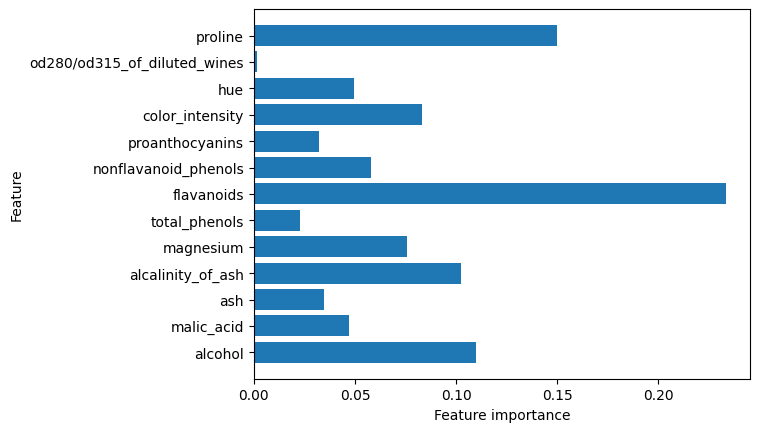

In [ ]:
# plot feature importances
def plot_feature_importances_wine(model):
    n_features = wine.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), wine.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_wine(forest)

# Support Vector Machines

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit



## Testing/Training Split Evaluation

In [22]:
# polynomial kernel
svmPoly1 = SVC(kernel='poly', C=10).fit(X_train, y_train)

# accuracy
print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test, y_test)))


Accuracy on training set: 0.75
Accuracy on test set: 0.67


In [24]:
# polynomial kernel
# classification report
print(classification_report(y_test, svmPoly1.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       0.79      0.90      0.84        30
     class 2       0.64      0.77      0.70        35
     class 3       0.46      0.25      0.32        24

    accuracy                           0.67        89
   macro avg       0.63      0.64      0.62        89
weighted avg       0.64      0.67      0.65        89



In [25]:
# radial basis function kernel
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.39


In [26]:
# radial basis function kernel
# classification report
print(classification_report(y_test, svmRBF1.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00        30
     class 2       0.39      0.97      0.56        35
     class 3       1.00      0.04      0.08        24

    accuracy                           0.39        89
   macro avg       0.46      0.34      0.21        89
weighted avg       0.42      0.39      0.24        89



## Parameter Selection with Grid Search


In [27]:
# import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# import GridSearchCV and set ranges for C and gamma and create the paramter grid
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [28]:
# polynomial kernel
gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.0001} with a score of 0.99


In [29]:
# radial basis function kernel
gridRBF = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridRBF.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridRBF.best_params_, gridRBF.best_score_))

The best parameters are {'C': 100000.0, 'gamma': 1e-06} with a score of 0.98
